In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
io = r'F:\清华课程\大数据分析\HW1_all\data.xlsx'
data = pd.read_excel(io, sheet_name = 0)
data.head()

,群名,群类别,群人数,消息数,稠密度,性别比,平均年龄,年龄差,地域集中度,手机比例,会话数,无回应比例,夜聊比例,图片比例
0,**手酒吧,1,63,315,0.051715,0.882353,26.681818,6.409413,0.222222,0.088889,23,0.434783,0.085714,0.069841
1,**秀嘉园,1,73,2,0.010274,0.579710,27.500000,9.042524,0.406780,0.000000,2,1.000000,1.000000,0.000000
2,**ˇ⒊無黒\噵丶⒈群,1,73,4,0.024163,0.750000,23.415385,4.699893,0.287879,0.500000,4,1.000000,0.000000,0.250000
3,**海网管工作联系基地,1,91,14,0.006105,0.901639,29.409091,2.854965,0.340426,0.142857,7,1.000000,0.250000,0.000000
4,tbsgame.net/bbs,1,133,2112,0.011107,0.961832,30.319672,4.669866,0.110236,0.167140,327,0.532110,0.104640,0.037879


In [3]:
D = data
D.head()

,群名,群类别,群人数,消息数,稠密度,性别比,平均年龄,年龄差,地域集中度,手机比例,会话数,无回应比例,夜聊比例,图片比例
0,**手酒吧,1,63,315,0.051715,0.882353,26.681818,6.409413,0.222222,0.088889,23,0.434783,0.085714,0.069841
1,**秀嘉园,1,73,2,0.010274,0.579710,27.500000,9.042524,0.406780,0.000000,2,1.000000,1.000000,0.000000
2,**ˇ⒊無黒\噵丶⒈群,1,73,4,0.024163,0.750000,23.415385,4.699893,0.287879,0.500000,4,1.000000,0.000000,0.250000
3,**海网管工作联系基地,1,91,14,0.006105,0.901639,29.409091,2.854965,0.340426,0.142857,7,1.000000,0.250000,0.000000
4,tbsgame.net/bbs,1,133,2112,0.011107,0.961832,30.319672,4.669866,0.110236,0.167140,327,0.532110,0.104640,0.037879


In [4]:
X_train = D.drop(['群名','群类别'], axis=1)
Y_train = D['群类别']
Y_train = Y_train-1
Y_train

0       0
1       0
2       0
3       0
4       0
       ..
2035    4
2036    4
2037    4
2038    4
2039    4
Name: 群类别, Length: 2040, dtype: int64

In [5]:
X_train = (X_train-X_train.min())/(X_train.max()-X_train.min())
X_train.head()

,群人数,消息数,稠密度,性别比,平均年龄,年龄差,地域集中度,手机比例,会话数,无回应比例,夜聊比例,图片比例
0,0.006157,0.000900,0.084357,0.882353,0.436138,0.449713,0.157754,0.088889,0.019180,0.434783,0.085714,0.069841
1,0.011288,0.000003,0.016360,0.579710,0.462407,0.644673,0.357609,0.000000,0.000872,1.000000,1.000000,0.000000
2,0.011288,0.000009,0.039149,0.750000,0.331264,0.323137,0.228853,0.500000,0.002616,1.000000,0.000000,0.250000
3,0.020523,0.000037,0.009520,0.901639,0.523702,0.186536,0.285755,0.142857,0.005231,1.000000,0.250000,0.000000
4,0.042073,0.006050,0.017728,0.961832,0.552938,0.320914,0.036486,0.167140,0.284220,0.532110,0.104640,0.037879


In [6]:
logreg = LogisticRegression(penalty = 'l2', dual=False,
                            C =1.0, fit_intercept=True, intercept_scaling=1,
                            class_weight='balanced', random_state=None, solver='sag',
                            max_iter=500, multi_class='multinomial', verbose=0,
                            warm_start=False, n_jobs=None, l1_ratio=None)
logreg.fit(X_train, Y_train)
# Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

61.67

In [7]:
logreg.predict(X_train)

array([0, 0, 0, ..., 1, 3, 4], dtype=int64)

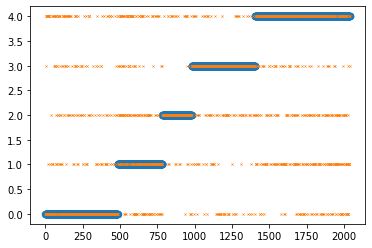

In [8]:
plt.scatter(range(2040), Y_train,s=50, marker = 'o',linewidth = 0.5)
y_pred = logreg.predict(X_train)
plt.scatter(range(2040),y_pred,s = 5,marker = 'x',linewidth = 0.5)
plt.show()

In [9]:
C = logreg.coef_
C.shape

(5, 12)

In [10]:
B = logreg.intercept_
B.shape

(5,)

In [11]:
C.shape, X_train.shape
A = np.matmul(C, np.transpose(np.array(X_train))) + B
R = 1/(1 + np.exp(-A))
R

ValueError: operands could not be broadcast together with shapes (5,2040) (5,) 

In [12]:
plt.scatter(range(784),R, s=1)
plt.scatter(range(784), Y_train, s=1)
plt.show()

NameError: name 'R' is not defined